# MNIST

### fetch mnist

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [90]:
X, y = mnist['data'], mnist['target']

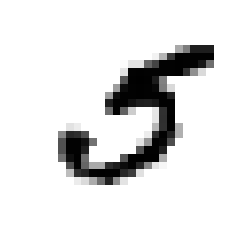

In [91]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

some_digit = X[36000]

some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [127]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [128]:
import numpy as np

shuffled_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_idx], y[shuffled_idx]

## Binary classifier

In [129]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [130]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=-np.infty)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [131]:
sgd_clf.predict([some_digit])

array([False])

### Binary classifier performanse

#### Cross-val

In [132]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9613 , 0.9451 , 0.95465])

In [133]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [134]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90905, 0.9087 , 0.9112 ])

#### Confusion matrix

In [135]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [136]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53564,  1015],
       [ 1764,  3657]])

#### Precession and recall

In [16]:
from sklearn.metrics import precision_score, recall_score

In [137]:
precision_score(y_train_5, y_train_pred)

0.7827482876712328

In [138]:
recall_score(y_train_5, y_train_pred)

0.6745987825124515

In [139]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7246606559001287

In [140]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [141]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

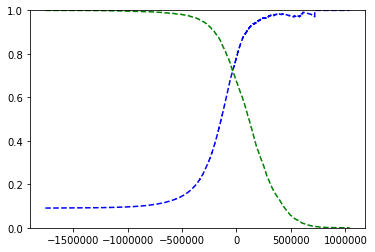

In [142]:
def plot_precision_recall_vs_thr(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label='prec')
    plt.plot(thresholds, recall[:-1], 'g--', label='rec')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_thr(precision, recall, thresholds)
plt.show()

In [143]:
y_train_pred_90 = (y_scores > 70000)

In [144]:
precision_score(y_train_5, y_train_pred_90)

0.8827020915771623

In [145]:
recall_score(y_train_5, y_train_pred_90)

0.576092971776425

In [146]:
sgd_clf.decision_function([some_digit])

array([-24438.5478405])

#### ROC curve

In [147]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y_train_5, y_scores)

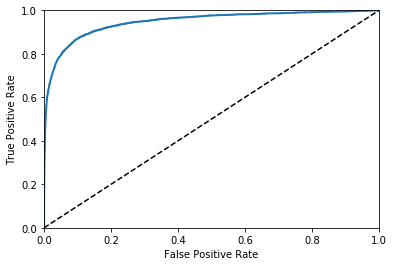

In [148]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [149]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9471221005513386

#### Random Forest Classifienr

In [150]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_score = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [151]:
y_scores_forest = y_probas_score[:, 1]
fpr_forest, tpr_forest, thr_forest = roc_curve(y_train_5, y_scores_forest)

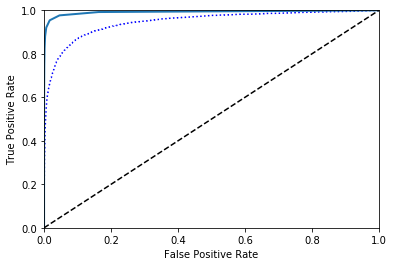

In [152]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.show()

In [153]:
roc_auc_score(y_train_5, y_scores_forest)

0.9923135708482036

In [154]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [155]:
precision_score(y_train_5, y_train_pred_forest)

0.982001755926251

In [156]:
recall_score(y_train_5, y_train_pred_forest)

0.8253089835823649

# Multiclass classifier

In [157]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [158]:
sgd_clf.predict([some_digit])

array([5.])

In [159]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-111032.20828357, -499192.20881738, -339528.08821066,
        -147623.82053763, -537703.1745453 ,  -24438.5478405 ,
        -617459.11129373, -434692.26074898, -754652.03335561,
        -764464.88778665]])

In [160]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5, tol=-np.infty))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [161]:
ovo_clf.predict([some_digit])

array([5.])

In [162]:
len(ovo_clf.estimators_)

45

In [163]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [164]:
forest_clf.predict([some_digit])

array([5.])

In [165]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [166]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87057588, 0.83854193, 0.85742861])

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [168]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.91161768, 0.9080454 , 0.90978647])

# Error Analysis

In [169]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [170]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [171]:
conf_mx

array([[5739,    4,   20,   11,   10,   44,   49,    8,   36,    2],
       [   2, 6443,   50,   29,    5,   40,    9,   11,  141,   12],
       [  55,   35, 5323,   96,   83,   24,   99,   56,  169,   18],
       [  45,   35,  139, 5341,    2,  238,   35,   51,  145,  100],
       [  18,   23,   33,   11, 5365,    8,   58,   30,   80,  216],
       [  69,   40,   31,  176,   66, 4610,  113,   24,  190,  102],
       [  37,   20,   43,    2,   45,   84, 5632,    5,   49,    1],
       [  25,   19,   65,   27,   51,   10,    7, 5806,   17,  238],
       [  49,  136,   71,  150,   15,  160,   62,   24, 5048,  136],
       [  38,   25,   26,   91,  171,   39,    3,  199,   75, 5282]])

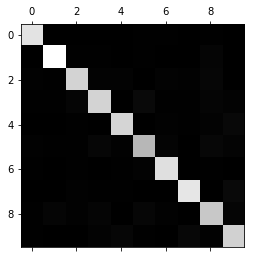

In [172]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [173]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

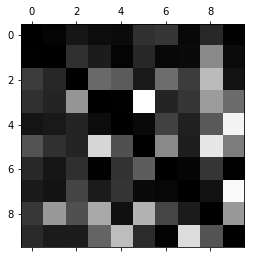

In [174]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification 

In [175]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [176]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
# takes too long time on cpu 

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=2, verbose=2)

In [ ]:
f1_score(y_train, y_train_knn_pred, average='macro')

# Multioutput Classification

In [177]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [178]:
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    #plt.axis("off")

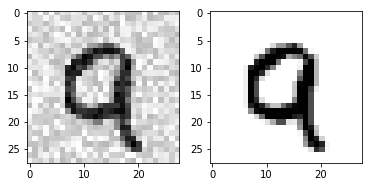

In [179]:
plt.subplot(1,2,1)
plot_digit(X_train_mod[36001])
plt.subplot(1,2,2)
plot_digit(y_train_mod[36001])

In [180]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

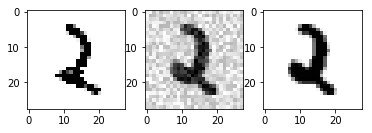

In [182]:
clean_digit = knn_clf.predict([X_test_mod[3000]])
plt.subplot(1, 3, 1)
plot_digit(clean_digit)
plt.subplot(1,3,2)
plot_digit(X_test_mod[3000])
plt.subplot(1,3,3)
plot_digit(y_test_mod[3000])

# Exercises

## Ex 1: train mnist classifier w/ 97+% accuracy

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1, 5, 10, 30]
}]

knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, param_grid, cv=3)

Следующая ячейка должна натренировать классификотор с точностью > 0.97, но ее слишком долго исполнять на cpu

In [67]:
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

## Ex 2: Shift mnist image

In [216]:
def shift(img):
    if img.shape[0] == 784:
        img = img.reshape(28, 28)
        
    # output array
    out = np.ndarray((4, 784))
    
    # shift up
    buf = np.zeros(img.shape)
    
    for i in range(0, 27):
        buf[i] = img[i+1]
    out[0] = buf.reshape((784,))
    
    # shift down
    buf = np.zeros(img.shape)
    for i in range(1, 28):
        buf[i] = img[i-1]
    out[1] = buf.reshape((784,))
    
    # shift right
    buf = np.zeros(img.shape)
    for i in range(1, 28):
        buf[:, i] = img[:, i-1]
    out[2] = buf.reshape((784,))
    
    # shift left
    buf = np.zeros(img.shape)
    for i in range(0, 27):
        buf[:, i] = img[:, i+1]
    out[3] = buf.reshape((784,))
    
    return out

In [257]:
def aug_data(samples, labels):
    out_samples = [sample for sample in samples]
    out_labels = [label for label in labels]
    
    for idx, (sample, label) in enumerate(zip(samples, labels)):
        shifted = shift(sample)
        for img in shifted:
            out_samples.append(img)
            out_labels.append(label)
    return out_samples, out_labels

X_train_aug, y_train_aug = aug_data(X_train_scaled, y_train)

In [266]:
cross_val_score(forest_clf, X_train_aug, y_train_aug, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.9min finished


array([0.95276142, 0.94841052, 0.94783791])

In [265]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished


array([0.94231154, 0.940097  , 0.93969095])

In [277]:
param_grid = [{
    'n_estimators': [10, 100, 500],
    'max_features': [10, 20, 30]
}]

grd_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [ ]:
grd_search.fit(X_train_aug, y_train_aug)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [271]:
from sklearn.metrics import accuracy_score

y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.2137

In [ ]:
clf = forest_clf